In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
excelFile = 'Cubing Data.xlsx'
solutions = pd.read_excel(excelFile)

In [2]:
date = 'Solution Date & Time'
solve = 'Time Elapsed (seconds)'
ao5 = 'Current Ao5'
ao12 = 'Current Ao12'
ao100 = 'Current Ao100'
del solutions['Scramble']

splits = [0,15,20,25,30,45,60]
splitNames = ['Sub-15', 'Sub-20', 'Sub-25', 'Sub-30', 'Sub-45', 'Sub-60']
# solutions['Single Splits'] = pd.cut(solutions['Time Elapsed (seconds)'], splits, right = False, labels=splitNames)
# The line above isn't required, but it can show visually how each time is categorized.

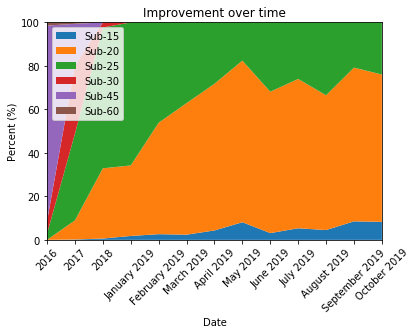

In [3]:
# This cell calculates and plots a normalized stackplot showing how solve times have decreased over the years.

now = datetime.datetime.now()
currentYear = now.year
activeYear = 0
activeMonth = 0

# Determine what range you want to count
solutionsPerRange = []
rangeLabels = []

for index, row in solutions.iterrows():
    if row[0].year != activeYear and row[0].year != currentYear: #when entering a new year
        activeYear = row[0].year
        solutionsPerRange.append(1)
        rangeLabels.append(str(activeYear))
    elif row[0].year == activeYear and row[0].year != currentYear: #when in a year != present year
        solutionsPerRange[-1] += 1
    else: #when in the present year we want monthly breakdowns
        if row[0].month != activeMonth: #when entering a new month
            activeMonth = row[0].month
            solutionsPerRange.append(1)
            rangeLabels.append(datetime.date(currentYear, activeMonth, 1).strftime('%B %Y'))
        else: #when in any month
            solutionsPerRange[-1] += 1

# print(solutionsPerRange)
# print(rangeLabels)

ranges = [0]
nextEnd = 0
for x in range(len(solutionsPerRange)):
    nextEnd += solutionsPerRange[x]
    ranges.append(nextEnd)

# print(ranges)

# Stacked plots need to have all of one kind of data together (e.g., all the sub-15s in one list).
# Therefore, splitCounter needs to be rewritten to run through each range, count the sub-x times,
# then run again and count the next set of sub-x times.

# A nicer alternative may be to run through each date range and collect how many of each time there are,
# then transpose that matrix. Could be easier to implement and prevents us from having to run through each 
# date range multiple times to get more data.
# This alternative was chosen and is implemented in the cell below.

totalSplits = []

for x in range(len(ranges)-1):
    rangeStart = ranges[x] + 1
    rangeEnd = ranges[x+1] + 1
    currentRange = solutions.iloc[rangeStart:rangeEnd]   
    splitCount = [0, 0, 0, 0, 0, 0]
    for index, row in currentRange.iterrows():
        if row[1] < 15:
            splitCount[0] += 1
        elif row[1] < 20:
            splitCount[1] += 1
        elif row[1] < 25:
            splitCount[2] += 1
        elif row[1] < 30:
            splitCount[3] += 1
        elif row[1] < 45:
            splitCount[4] += 1
        else:
            splitCount[5] += 1
    totalSplits.append(splitCount)

# print(totalSplits)

# Prepare the data for plotting
plotData = pd.DataFrame(totalSplits)
plotData = plotData.transpose()
plotData.index = splitNames
plotData.columns = rangeLabels

# Normalize the data
normalizedData = plotData.divide(plotData.sum(axis=0), axis=1)
normalizedData = normalizedData * 100

# Plot the data
plt.stackplot(range(len(rangeLabels)), normalizedData, labels=splitNames)
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Improvement over time')
plt.xticks(range(len(rangeLabels)),rangeLabels, rotation=45)
plt.xlabel('Date')
plt.ylabel('Percent (%)')
plt.show()

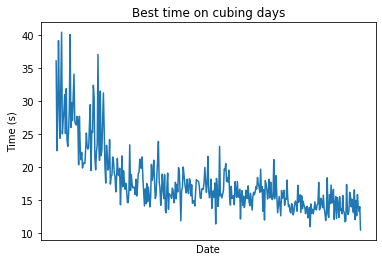

In [4]:
# This cell calculates the PB for every day in the data set

activeDay = 0
dailyPBs = []
cubingDays = []

for index, row in solutions.iterrows():
    if row[0].day != activeDay: # when entering a new day
        activeDay = row[0].day
        dailyPBs.append(row[1])
        cubingDays.append(str(row[0]))
    elif row[0].day == activeDay and row[1] < dailyPBs[-1]: # when a lower time is found that day
        dailyPBs[-1] = row[1]
    else: # repeat the process
        continue
        
#print(dailyPBs)
#print(cubingDays)
plt.plot(cubingDays, dailyPBs)
plt.title('Best time on cubing days')
plt.xlabel('Date')
plt.ylabel('Time (s)')
plt.xticks([])
plt.show()

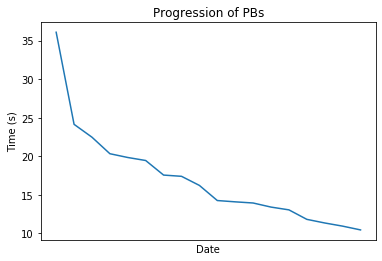

In [5]:
# This cell calculates the progression of my PBs over time

PBs = []
PBDates = []

for index, row in solutions.iterrows():
    if not PBs: # initializing the PB list
        PBs.append(row[1])
        PBDates.append(str(row[0].date))
    elif row[1] < PBs[-1]: # if we find a new PB
        PBs.append(row[1])
        PBDates.append(str(row[0].date))
    else: # repeat the process
        continue
        
#print(dailyPBs)
#print(cubingDays)
plt.plot(PBDates, PBs)
plt.title('Progression of PBs')
plt.xlabel('Date')
plt.ylabel('Time (s)')
plt.xticks([])
plt.show()

In [6]:
#Scorigami!

bestTime = solutions.min(axis=0)[1]
worstTime = solutions.max(axis=0)[1]

numberOfPossibleUniqueTimes = int((worstTime - bestTime) * 100)
uniqueTimes = solutions.iloc[:,1].unique()
numberOfUniqueTimes = len(uniqueTimes)
    
numberOfScorigamiTimes = numberOfPossibleUniqueTimes - numberOfUniqueTimes
percentOfScorigamis = numberOfUniqueTimes / numberOfPossibleUniqueTimes * 100

modalTime = float(solutions.iloc[:,1].mode())
frequencyTimes = solutions.iloc[:,1].value_counts()

#print(frequencyTimes)

timeFrequencySplits = [0,2,10,20,30,40,50]
timeFrequencySplitNames = ['1 Occurence', '2-10 Occurences', '11-20 Occurences', '21-30 Occurences', '31-40 Occurences', '41+ Occurences']
frequencySplits = pd.cut(frequencyTimes.iloc[:], timeFrequencySplits, right = False, labels=timeFrequencySplitNames)

# print(frequencySplits)

# This is a little convoluted, but the premise is that I want to know how many solve times have only occurred once.
# Some times have occured 40+ times, so it's nice to know that too. This the distribution of the frequency of solve frequencies.
frequencyOfFrequencies = frequencySplits.value_counts(sort = False)

print("Between my best time of", bestTime, "s and my worst time of", worstTime, "s, there are", numberOfPossibleUniqueTimes, "possible unique times.")
print("Unique times are discretely measured in units of 0.01s. One term used to describe specific rare instances of a score is scorigami, invented by Jon Bois.")
print("I have achieved", numberOfUniqueTimes, "of them. This is", round(percentOfScorigamis, 2), "% of all possible scorigami times.")
print("The time that appears the most frequently is", modalTime, "s.")
print("There are", frequencyOfFrequencies[0], "times that occur only once. These are true scorigamis. They had never been done before and have not been achieved since.")

Between my best time of 10.46 s and my worst time of 58.15 s, there are 4769 possible unique times.
Unique times are discretely measured in units of 0.01s. One term used to describe specific rare instances of a score is scorigami, invented by Jon Bois.
I have achieved 2245 of them. This is 47.07 % of all possible scorigami times.
The time that appears the most frequently is 20.52 s.
There are 601 times that occur only once. These are true scorigamis. They had never been done before and have not been achieved since.


## TODO:
### Progress evaluator for Ao5, 12, 100, etc.: To be implemented
### PB Tracker: In progress, must fix x axis ticks
### Weekday Evaluator: To be implemented
### Day-by-day PBs: In progress, must fix x axis ticks
### ~~Modal time: Done!~~
### ~~Scorigami (times I've never reached, H/T Jon Bois): Done!~~